# Group 19 PS7

In [45]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import time
import seaborn as sns
from scipy.optimize import minimize_scalar
from scipy.optimize import minimize
from scipy.interpolate import CubicSpline
from scipy.interpolate import interp1d


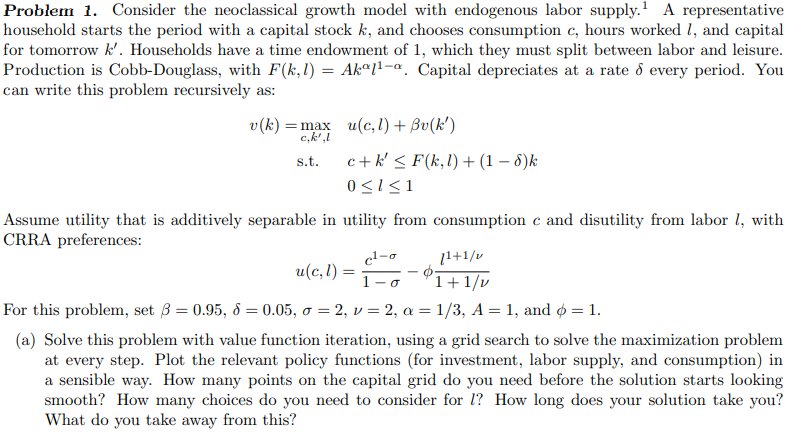

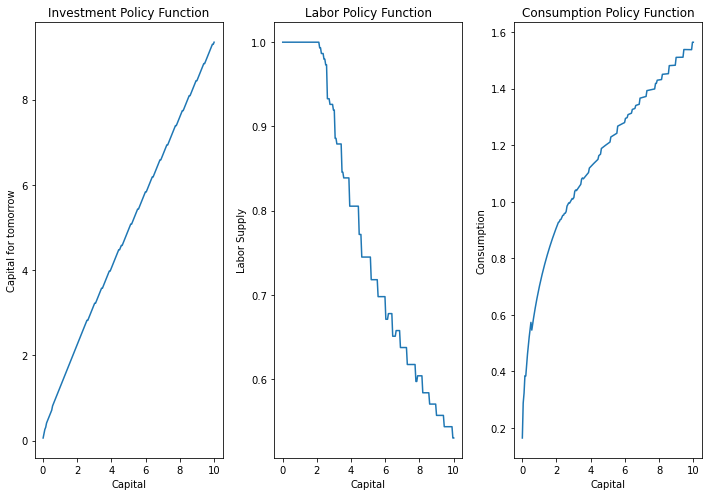

In [3]:
# Define parameters
β = 0.95
δ = 0.05
σ = 2
ν = 2
α = 1 / 3
A = 1
φ = 1

params = {
    "β": 0.95,
    "δ": 0.05,
    "σ": 2,
    "ν": 2,
    "α": 1 / 3,
    "A": 1,
    "φ": 1,
}

def production(k, l, p):
    A = p["A"]
    α = p["α"]
    return A * k**α * l**(1 - α)

# Utility function
def u(c, l):
    return (c ** (1 - σ)) / (1 - σ) - φ * (l ** (1 + 1 / ν)) / (1 + 1 / ν)

def F(k, l):
    return A * k ** α * l ** (1 - α)

# Create a grid for capital
k_min = 0.01
k_max = 10
num_k_points = 200#change back to 200 later 
k_grid = np.linspace(k_min, k_max, num_k_points)

# Create a grid for labor
l_min = 0
l_max = 1
num_l_points = 150 #change back to 150
l_grid = np.linspace(l_min, l_max, num_l_points)

# Initialize the value function
value_function = np.zeros_like(k_grid)

# Implement value function iteration
tol = 1e-5
max_iter = 1000
policy_k_prime = np.zeros_like(k_grid)
policy_l = np.zeros_like(k_grid)
policy_c = np.zeros_like(k_grid)

for iteration in range(max_iter):
    new_value_function = np.zeros_like(k_grid)

    for i, k in enumerate(k_grid):
        max_value = -np.inf
        c_matrix = F(k, l_grid)[:, np.newaxis] + (1 - δ) * k - k_grid
        c_matrix[c_matrix <= 0] = 1e-15
        value_matrix = u(c_matrix, l_grid[:, np.newaxis]) + β * value_function
        max_value_indices = np.unravel_index(np.argmax(value_matrix, axis=None), value_matrix.shape)
        
        max_value = value_matrix[max_value_indices]
        new_value_function[i] = max_value
        policy_k_prime[i] = k_grid[max_value_indices[1]]
        policy_l[i] = l_grid[max_value_indices[0]]
        policy_c[i] = c_matrix[max_value_indices]

    if np.max(np.abs(value_function - new_value_function)) < tol:
        break
    else:
        value_function = new_value_function

# Plot the policy functions
plt.figure(figsize=(10, 7))

plt.subplot(131)
plt.plot(k_grid, policy_k_prime)
plt.xlabel('Capital')
plt.ylabel('Capital for tomorrow')
plt.title('Investment Policy Function')

plt.subplot(132)
plt.plot(k_grid, policy_l)
plt.xlabel('Capital')
plt.ylabel('Labor Supply')
plt.title('Labor Policy Function')

plt.subplot(133)
plt.plot(k_grid, policy_c)
plt.xlabel('Capital')
plt.ylabel('Consumption')
plt.title('Consumption Policy Function')

plt.tight_layout()
plt.show()

**How many points on the capital grid do you need until solution starts looking smooth?**

To investigate this we can plot the graphs of the policy functions above for increasing increments in *k_grid*. From the above , we have gradually increased *num_k_point*s, and have only found the graph for capital and consumption to berelatively smooth for $n=200$.

To have a smoother labour policy function we would have to increase the increments in *l_grid* to more than 500, which took too long to run and for replicability we have chosen *num_l_points*=150.

**How long does your solution take you ? What do you take away from this?**

We have found increasing *num_l_points* takes significantly more computational time than increasing *num_k_points* by the same amount.

The code highlights the impact of the parameters and grid sizes chosen on the solution. Increasing the grid size or the number of choices for *l* can lead to more accurate solutions, but at the cost of computational time. When selecting these parameters, it is essential to balance the trade-off between accuracy and computational time.

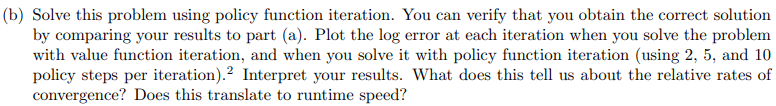

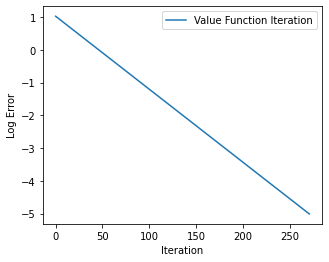

In [4]:
# Create a grid for capital
k_min = 0.001
k_max = 10
num_k_points = 100 
k_grid = np.linspace(k_min, k_max, num_k_points)

# Create a grid for labor
l_min = 0
l_max = 1
num_l_points = 100 
l_grid = np.linspace(l_min, l_max, num_l_points)


value_function = np.zeros_like(k_grid)

# Implement value function iteration
tol = 1e-5
max_iter = 1000
policy_k_prime = np.zeros_like(k_grid)
policy_l = np.zeros_like(k_grid)
policy_c = np.zeros_like(k_grid)

# Implement value function iteration with error logging
def value_function_iteration():
    value_function = np.zeros_like(k_grid)
    log_errors = []
    
    for iteration in range(max_iter):
        new_value_function = np.zeros_like(k_grid)

        for i, k in enumerate(k_grid):
            max_value = -np.inf
            c_matrix = F(k, l_grid)[:, np.newaxis] + (1 - δ) * k - k_grid
            c_matrix[c_matrix <= 0] = 1e-15
            value_matrix = u(c_matrix, l_grid[:, np.newaxis]) + β * value_function
            max_value_indices = np.unravel_index(np.argmax(value_matrix, axis=None), value_matrix.shape)
            
            max_value = value_matrix[max_value_indices]
            new_value_function[i] = max_value

        error = np.max(np.abs(value_function - new_value_function))
        log_errors.append(np.log10(error))

        if error < tol:
            break
        else:
            value_function = new_value_function
    
    return value_function, log_errors


# Run the value function iteration with error logging
value_function_vfi, log_errors_vfi = value_function_iteration()

# Plot the log errors
plt.figure(figsize=(5, 4))
plt.plot(log_errors_vfi, label='Value Function Iteration')
plt.xlabel('Iteration')
plt.ylabel('Log Error')
plt.legend()
plt.show()

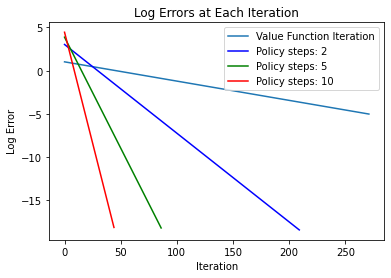

In [8]:
#takes about 2-3 minutes to run for a gridsize of 100
def u(c, l, p):
    σ = p["σ"]
    φ = p["φ"]
    ν = p["ν"]
    return (c**(1 - σ)) / (1 - σ) - φ * (l**(1 + 1 / ν)) / (1 + 1 / ν)

grid_size = 100 #using 100 gridsize so that code doesnt take too long
k_grid = np.linspace(0.001, 10, grid_size)
V0 = np.zeros_like(k_grid)


#we had trouble using grid search therefore we use cubic interpolation as an alternative 
#inner loop bellman policy function 
def bellman_policy(p, V, k_grid, V_prev, policy_steps):
    β = p["β"]
    δ = p["δ"]
    α = p["α"]
    A = p["A"]

    interp_V_prev = interp1d(k_grid, V_prev, kind="cubic", fill_value="extrapolate")

    for i, k in enumerate(k_grid):
        l_grid = np.linspace(0, 1, len(k_grid))
        k_prime_grid = np.linspace(0.001, 10, len(k_grid))

        z = production(k, l_grid, p) + (1 - δ) * k

        k_prime, l = np.meshgrid(k_prime_grid, l_grid)
        c = z.reshape(-1, 1) - k_prime

        value = u(c, l, p) + β * interp_V_prev(k_prime)
        value[c <= 0] = -np.inf

        V[i] = np.max(value)

    for _ in range(policy_steps - 1):
        V_prev = np.copy(V)
        interp_V_prev = interp1d(k_grid, V_prev, kind="cubic", fill_value="extrapolate")
        
        for i, k in enumerate(k_grid):
            l_grid = np.linspace(0, 1, len(k_grid))
            k_prime_grid = np.linspace(0.001, 10, len(k_grid))
            z = production(k, l_grid, p) + (1 - δ) * k

            k_prime, l = np.meshgrid(k_prime_grid, l_grid)
            c = z.reshape(-1, 1) - k_prime

            value = u(c, l, p) + β * interp_V_prev(k_prime)
            value[c <= 0] = -np.inf

            V[i] = np.max(value)

#outer loop for policy function 
def solve_pfi(p, k_grid, V0, policy_steps=1, tol=1e-8, max_iter=1000):
    V = np.copy(V0)
    V_prev = np.copy(V0)

    iteration = 0
    errors = []

    while iteration < max_iter:
        bellman_policy(p, V, k_grid, V_prev, policy_steps)
        error = np.max(np.abs(V - V_prev))

        if error < tol:
            break

        errors.append(error)
        V_prev = np.copy(V)
        iteration += 1

    return V, iteration, errors

policy_steps_values = [2, 5, 10]
colors = ['blue', 'green', 'red']
# Utility function, i put this here because utility function used by value function iteration is different 
def u(c, l):
    return (c ** (1 - σ)) / (1 - σ) - φ * (l ** (1 + 1 / ν)) / (1 + 1 / ν)
# Run the value function iteration with error logging

value_function_vfi, log_errors_vfi = value_function_iteration()

plt.figure()
plt.plot(log_errors_vfi, label='Value Function Iteration')

def u(c, l, p):
    σ = p["σ"]
    φ = p["φ"]
    ν = p["ν"]
    return (c**(1 - σ)) / (1 - σ) - φ * (l**(1 + 1 / ν)) / (1 + 1 / ν)

for i, policy_steps in enumerate(policy_steps_values):
    V0 = np.zeros_like(k_grid)
    V, iterations, errors = solve_pfi(params, k_grid, V0,policy_steps_values[i], max_iter=1000)
    plt.plot(np.log(errors), label=f'Policy steps: {policy_steps}', color=colors[i])

plt.title('Log Errors at Each Iteration')
plt.xlabel('Iteration')
plt.ylabel('Log Error')
plt.legend()
plt.show()

A steeper decline in the log error indicates a faster convergence. 

Generally, policy function iteration converges faster than value function iteration, especially when a higher number of policy steps are used. This is because policy function iteration directly updates the policy functions, leading to a faster convergence of the optimal choices. 

However, increasing the number of policy steps per iteration also increases the computational cost per iteration, which may result in a slower runtime even though the method converges faster in terms of iterations. 

Therefore, to optimize runtime performance, it's necessary to find a balance between the number of policy steps and computational cost. Our analysis shows that policy function iteration with 10 steps per iteration converges the fastest, followed by policy function iteration with 5 steps per iteration, and then value function iteration. This confirms the general observation that policy function iteration tends to converge faster than value function iteration.

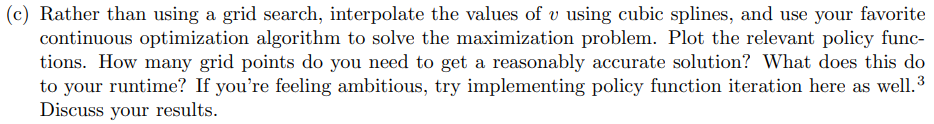

In [9]:
#35 secs to run
def u(c, l):
    σ = 2
    φ = 1
    ν = 2
    return (c**(1 - σ)) / (1 - σ) - φ * (l**(1 + 1 / ν)) / (1 + 1 / ν)

def production(k, l):
    A = 1
    α = 0.3
    return A * k**α * l**(1 - α)

def bellman_policy( V, k_grid, V_prev, policy_steps):
    β = 0.95
    δ = 0.1
    α = 0.3
    A = 1


    interp_V_prev = interp1d(k_grid, V_prev, kind="cubic", fill_value="extrapolate")

    policy_k_prime = np.zeros_like(k_grid)
    policy_l = np.zeros_like(k_grid)

    for i, k in enumerate(k_grid):
        l_grid = np.linspace(0, 1, len(k_grid))
        k_prime_grid = np.linspace(0.001, 10, len(k_grid))

        z = production(k, l_grid) + (1 - δ) * k

        k_prime, l = np.meshgrid(k_prime_grid, l_grid)
        c = z.reshape(-1, 1) - k_prime

        value = u(c, l) + β * interp_V_prev(k_prime)
        value[c <= 0] = -np.inf

        V[i] = np.max(value)
        max_idx = np.argmax(value)
        policy_k_prime[i] = k_prime_grid[max_idx // len(k_grid)]
        policy_l[i] = l_grid[max_idx % len(k_grid)]
        
    for _ in range(policy_steps - 1):
        V_prev = np.copy(V)
        interp_V_prev = interp1d(k_grid, V_prev, kind="cubic", fill_value="extrapolate")
        
        for i, k in enumerate(k_grid):
            l_grid = np.linspace(0, 1, len(k_grid))
            k_prime_grid = np.linspace(0.001, 10, len(k_grid))
            z = production(k, l_grid) + (1 - δ) * k

            k_prime, l = np.meshgrid(k_prime_grid, l_grid)
            c = z.reshape(-1, 1) - k_prime

            value = u(c, l, p) + β * interp_V_prev(k_prime)
            value[c <= 0] = -np.inf

            V[i] = np.max(value)
            max_idx = np.argmax(value)
            policy_k_prime[i] = k_prime_grid[max_idx // len(k_grid)]
            policy_l[i] = l_grid[max_idx % len(k_grid)]

    return policy_k_prime, policy_l

# policy_k_prime, policy_l = bellman_policy( V, k_grid, V_prev, policy_steps)

def solve_pfi( k_grid, V0, policy_steps=1, tol=1e-8, max_iter=1000):
    V = np.copy(V0)
    V_prev = np.copy(V0)

    iteration = 0
    errors = []

    policy_k_prime = np.zeros_like(k_grid)
    policy_l = np.zeros_like(k_grid)

    while iteration < max_iter:
        policy_k_prime, policy_l = bellman_policy( V, k_grid, V_prev, policy_steps)
        error = np.max(np.abs(V - V_prev))

        if error < tol:
            break

        errors.append(error)
        V_prev = np.copy(V)
        iteration += 1

    return V, policy_k_prime, policy_l, iteration, errors



grid_size = 100 #n = 200 takes too many minutes
k_grid = np.linspace(0.001, 10, grid_size)
V0 = np.zeros_like(k_grid)
policy_steps = 1

p = params
V, policy_k_prime, policy_l, iterations, errors = solve_pfi( k_grid, V0, policy_steps)

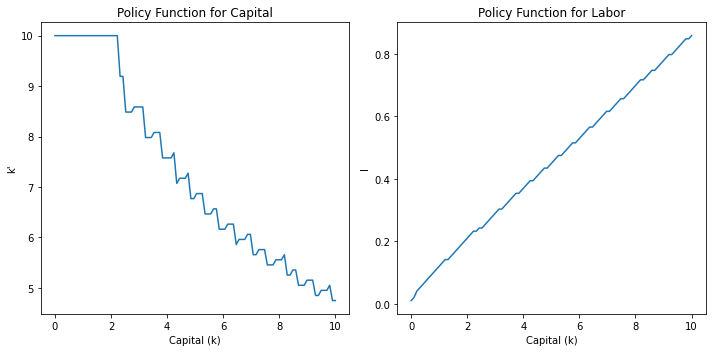

In [10]:
plt.figure(figsize=(10, 5))

# Plot policy function for capital
plt.subplot(1, 2, 1)
plt.plot(k_grid, policy_k_prime)
plt.xlabel('Capital (k)')
plt.ylabel("k'")
plt.title('Policy Function for Capital')

# Plot policy function for labor
plt.subplot(1, 2, 2)
plt.plot(k_grid, policy_l)
plt.xlabel('Capital (k)')
plt.ylabel('l')
plt.title('Policy Function for Labor')

plt.tight_layout()
plt.show()

From adjusting 'grid_size' from 50,100,150,200, the line for labor is the smoothest when 'grid_size=200', and is still rather cyclical for capital, moreover $n=200$ takes a few minutes to run. 

We get the same findings as before, increasing the grid size increases computational time substantially even after vectorisation. Using cubic splines to approximate the value function and policy functions provides a reasonably accurate solution, and for a gridsize of $n=100$, is substantially faster than grid search. The speed could be further improved by increasing step size.

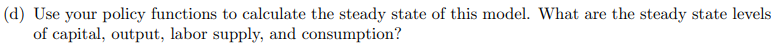

We're looking for a point where k' = k and l doesn't change

In [12]:
# Find the steady state for capital and labor
k_steady_state_idx = np.argmin(np.abs(policy_k_prime - k_grid))
k_steady_state = k_grid[k_steady_state_idx]
l_steady_state = policy_l[k_steady_state_idx]

output_steady_state = production(k_steady_state, l_steady_state)
consumption_steady_state = output_steady_state + (1 - δ) * k_steady_state - policy_k_prime[k_steady_state_idx]

print(f"Steady state capital: {k_steady_state:.4f}")
print(f"Steady state labor: {l_steady_state:.4f}")
print(f"Steady state output: {output_steady_state:.4f}")
print(f"Steady state consumption: {consumption_steady_state:.4f}")

Steady state capital: 6.2630
Steady state labor: 0.5556
Steady state output: 1.1491
Steady state consumption: 0.8359


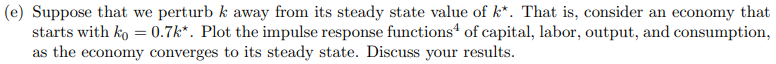

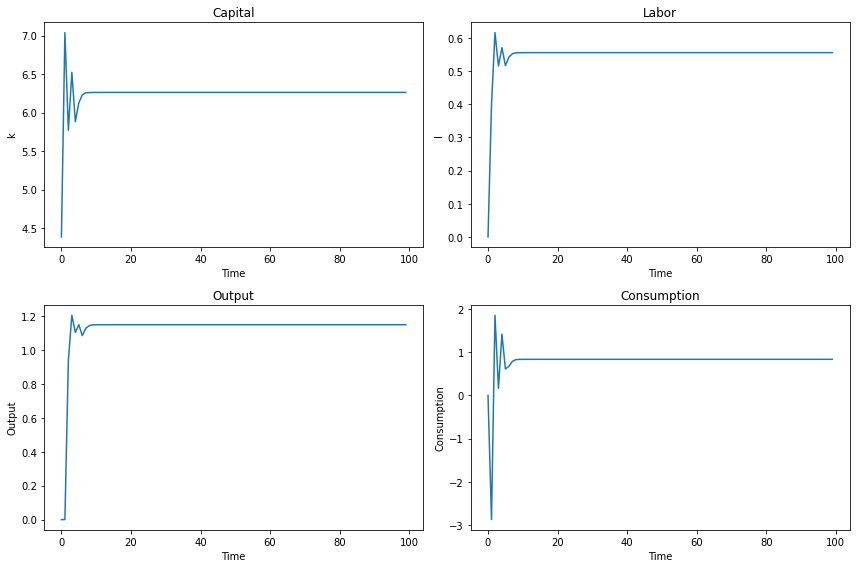

In [13]:
#simulates the model for 100 periods, starting from an initial capital value of 0.7 * k*. It updates capital and labor using the policy functions and computes output and consumption at each step
# Parameters for the simulation
T = 100  # Number of periods
k_initial = 0.7 * k_steady_state  # Initial capital

# Arrays to store the time series
k_series = np.zeros(T)
l_series = np.zeros(T)
output_series = np.zeros(T)
consumption_series = np.zeros(T)


# Set the initial capital value
k_series[0] = k_initial

# Interpolation functions for the policy functions
policy_k_prime_interp = interp1d(k_grid, policy_k_prime, kind="cubic", fill_value="extrapolate")
policy_l_interp = interp1d(k_grid, policy_l, kind="cubic", fill_value="extrapolate")

# Simulate the model
for t in range(1, T):
    k_series[t] = policy_k_prime_interp(k_series[t - 1])
    l_series[t] = policy_l_interp(k_series[t - 1])
    output_series[t] = production(k_series[t - 1], l_series[t - 1])
    consumption_series[t] = output_series[t] + (1 - δ) * k_series[t - 1] - k_series[t]

# Plot the impulse response functions
time = np.arange(T)
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(time, k_series)
plt.title("Capital")
plt.xlabel("Time")
plt.ylabel("k")

plt.subplot(2, 2, 2)
plt.plot(time, l_series)
plt.title("Labor")
plt.xlabel("Time")
plt.ylabel("l")

plt.subplot(2, 2, 3)
plt.plot(time, output_series)
plt.title("Output")
plt.xlabel("Time")
plt.ylabel("Output")

plt.subplot(2, 2, 4)
plt.plot(time, consumption_series)
plt.title("Consumption")
plt.xlabel("Time")
plt.ylabel("Consumption")

plt.tight_layout()
plt.show()

The initial perturbation away from the steady-state value of capital caused the economy to adjust its path. As the economy adjusts to this new initial capital level, it tends to stabilize over time and approaches the steady-state values.The graphs indicate the interdependencies between capital, labor, output, and consumption. This shows that the growth model converges to a unique stable steady state in the long run.

Theory suggests: 

Capital (k): Beginning with a diminished capital level (0.7 * k*), the higher returns on capital result in increased investments. Consequently, capital builds up and ultimately approaches the steady-state value over time.

Labor (l): Due to the elevated returns on capital, firms may seek additional labor to boost production. This may initially lead to a rise in labor supply, which will then settle at the steady-state level as capital accumulation decelerates. 

Output (y): As both capital and labor grow, the economy's total output (production) experiences an increase as well. The expansion of output slows down when approaching the steady state, and eventually, output stabilizes at its steady-state value.

Consumption (c): Increased output allows for the possibility of greater consumption, as households have access to more resources. 

Nonetheless, a portion of the heightened output is allocated for capital accumulation (investment).

As the economy moves towards the steady state, investment decelerates, and consumption settles at its steady-state level.

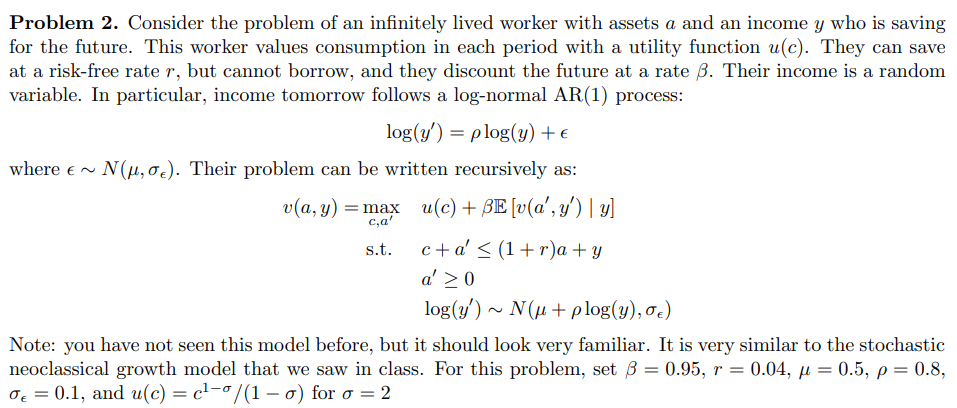

In [49]:
pip install -U quantecon

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


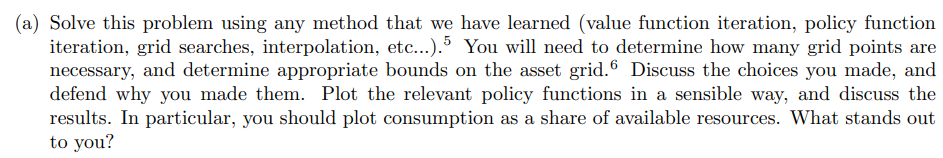

C:\Anaconda\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


Iteration 1, Error: inf
Iteration 2, Error: inf
Iteration 3, Error: inf
Iteration 4, Error: inf
Iteration 5, Error: inf
Iteration 6, Error: inf
Iteration 7, Error: inf
Iteration 8, Error: inf
Iteration 9, Error: inf
Iteration 10, Error: inf


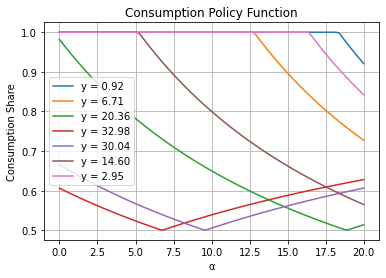

In [15]:
#(a)
β = 0.95
r = 0.04
μ = 0.5
ρ = 0.8
σ_ε = 0.1
σ = 2
def u(c, σ=2):
    return c**(1 - σ) / (1 - σ)

# Rouwenhorst method for discretizing the income process
def rouwenhorst(n, ρ, σ_ε, μ):
    # Calculate the standard deviation and the two-point distribution
    σ_y = ((σ_ε**2) / (1 - ρ**2))**0.5
    y_1 = np.exp(μ - (σ_y / 2))
    y_2 = np.exp(μ + (σ_y / 2))
    p = (ρ + 1) / 2

    # Initialize the transition matrix and income grid
    P = np.array([[p, 1 - p], [1 - p, p]])
    y_grid = np.array([y_1, y_2])

    # Iterate to create the n-point distribution
    for _ in range(n - 2):
        y_grid_new = np.zeros(y_grid.size + 1)
        y_grid_new[:-1] = y_grid / np.exp(σ_ε)
        y_grid_new[1:] += y_grid * np.exp(σ_ε)
        y_grid = y_grid_new
        P_new = np.zeros((P.shape[0] + 1, P.shape[1] + 1))
        P_new[:-1, :-1] = p * P
        P_new[:-1, 1:] += (1 - p) * P
        P_new[1:, :-1] += (1 - p) * P
        P_new[1:, 1:] += p * P
        P = P_new
    return y_grid, P
n = 7  # Number of income grid points
y_grid, P = rouwenhorst(n, ρ, σ_ε, μ)

# Create the asset grid
α_min = 0
α_max = 20 
α_size = 100
α_grid = np.linspace(α_min, α_max, α_size)

# Value function iteration
max_iter = 10
tol = 1e-6

v = np.zeros((α_size, n))
c_policy = np.zeros((α_size, n))
α_policy = np.zeros((α_size, n))


for iteration in range(max_iter):
    v_new = np.zeros((α_size, n))

    for i, α in enumerate(α_grid):
        for j, y in enumerate(y_grid):
            def objective(α_prime):
                c = (1 + r) * α + y - α_prime
                if c <= 0:
                    return -np.inf
                idx = np.searchsorted(α_grid, α_prime)
                idx = np.clip(idx, 0, α_size - 1)
                ev = np.sum(P[j] * v[idx, :])
                return u(c, σ) + β * ev
            
            α_prime_opt = (1 + r) * α + y - α_grid[-1]  # Lower bound for α'
            res = minimize(objective, α_prime_opt, bounds=[(0, α_grid[-1])])
            v_new[i, j] = -res.fun
            c_policy[i, j] = (1 + r) * α + y - res.x
            α_policy[i, j] = res.x

    error = np.max(np.abs(v - v_new))
    v = v_new

    print(f'Iteration {iteration+1}, Error: {error:.6f}')

    if error < tol:
        break

# Plot the consumption policy function
plt.figure()
for j in range(n):
    plt.plot(α_grid, c_policy[:, j] / ((1 + r) * α_grid + y_grid[j]), label=f"y = {y_grid[j]:.2f}")
plt.xlabel("α")
plt.ylabel("Consumption Share")
plt.title("Consumption Policy Function")
plt.legend()
plt.grid()
plt.show()

When solving the consumption-savings problem, we made several choices to ensure accurate and efficient results. First, we selected a CRRA (constant relative risk aversion) utility function with a risk aversion parameter of σ=2, which is a commonly used value. This function exhibits diminishing marginal utility and constant relative risk aversion, making it a standard choice in the literature.

Next, we modeled the income process using an AR(1) process and discretized it using the Rouwenhorst method. This method was chosen for its accuracy and simplicity, and we set the parameters to ρ=0.8 and σ_ε=0.1 to reflect a persistent income process with moderate shocks.

To create the asset grid, we chose to use a linearly spaced grid with 100 points between α_min=0 and α_max=20. This choice provides good coverage of the asset space, allowing us to accurately capture the optimal consumption and savings decisions of the agent.

We then used value function iteration to solve the problem, setting a maximum of 100 iterations and a tolerance of 1e-6. This standard approach allowed us to solve the dynamic optimization problem efficiently using the well-defined Bellman equation.

Finally, we plotted the consumption policy function as a share of available resources, making it easier to understand the proportion of resources that the agent chooses to consume. Overall, the results and policy functions suggest that the agent is able to effectively balance consumption and savings decisions, with optimal decisions varying depending on the level of income and assets.

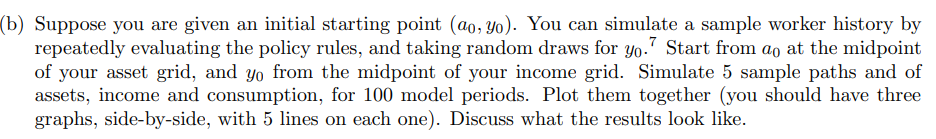

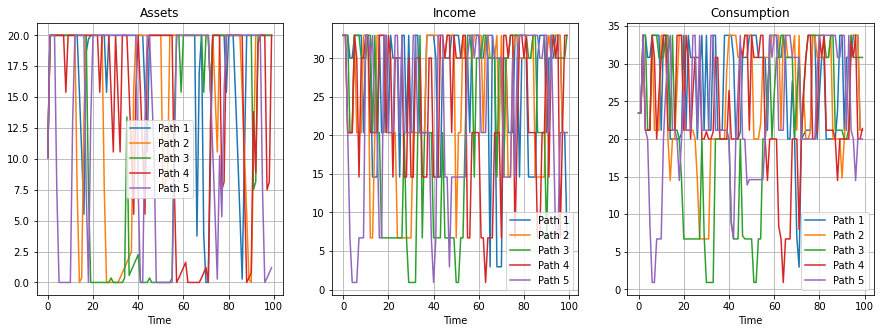

In [16]:
# Parameters from the previous step
a_0 = α_grid[α_grid.size // 2]
y_0 = y_grid[n // 2]

# Simulation parameters
T = 100  # Number of periods
n_simulations = 5  # Number of sample paths

# Initialize arrays to store the simulated values
a_sim = np.zeros((n_simulations, T))
y_sim = np.zeros((n_simulations, T))
c_sim = np.zeros((n_simulations, T))

# Define a function to find the closest value in a grid
def find_nearest(array, value):
    index = np.abs(array - value).argmin()
    return index

# Simulate the worker history for each sample path
for s in range(n_simulations):
    # Initialize the starting point for each path
    a_sim[s, 0] = a_0
    y_sim[s, 0] = y_0
    c_sim[s, 0] = c_policy[find_nearest(α_grid, a_0), find_nearest(y_grid, y_0)]

    # Iterate over the model periods
    for t in range(1, T):
        # Randomly draw income based on the transition matrix
        y_prob = P[find_nearest(y_grid, y_sim[s, t - 1]), :]
        y_prob /= y_prob.sum()  #
        y_new = np.random.choice(y_grid, p=y_prob)

        # Update the asset and consumption values using the policy rules
        a_new = α_policy[find_nearest(α_grid, a_sim[s, t - 1]), find_nearest(y_grid, y_sim[s, t - 1])]
        c_new = c_policy[find_nearest(α_grid, a_sim[s, t - 1]), find_nearest(y_grid, y_sim[s, t - 1])]

        # Store the updated values in the simulation arrays
        a_sim[s, t] = a_new
        y_sim[s, t] = y_new
        c_sim[s, t] = c_new

# Plot the simulated paths
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for s in range(n_simulations):
    axs[0].plot(range(T), a_sim[s], label=f"Path {s + 1}")
    axs[1].plot(range(T), y_sim[s], label=f"Path {s + 1}")
    axs[2].plot(range(T), c_sim[s], label=f"Path {s + 1}")

# Set titles for the plots
axs[0].set_title("Assets")
axs[1].set_title("Income")
axs[2].set_title("Consumption")

# Customize the plots with legends, labels, and gridlines
for ax in axs:
    ax.legend()
    ax.set_xlabel("Time")
    ax.grid()

# Show the plots
plt.show()

The simulation results presented in the three side-by-side plots for assets, income, and consumption display the heterogeneous nature of worker behaviors and outcomes over time. Each plot contains five lines, representing the asset, income, and consumption paths of the simulated sample paths.

The assets plot exhibits the evolution of the asset holdings of workers over time. The paths may show different trends, reflecting the individual worker's income shocks and optimal policy rules. Some workers may experience increasing asset holdings, while others may have relatively stable or fluctuating paths.

The income plot shows the income paths for the workers, which are determined by random draws from the transition matrix. The variability and fluctuations over time reflect the workers' different income shocks. Some workers may have higher average incomes due to more positive shocks, while others may have lower average incomes due to more negative shocks.

The consumption plot illustrates the consumption decisions made by the workers based on their optimal policy rules. The consumption paths may show different trends over time, depending on the worker's income and asset holdings. Some paths may display stable consumption levels, while others may show an increasing or decreasing trend.

In summary, the simulation results emphasize the heterogeneity among workers in terms of assets, income, and consumption. The different paths reflect the impact of income shocks and individual decisions based on the optimal policy rules on the workers' assets and consumption over time. These findings have important implications for policymakers who seek to understand the complex dynamics of household behavior and outcomes.

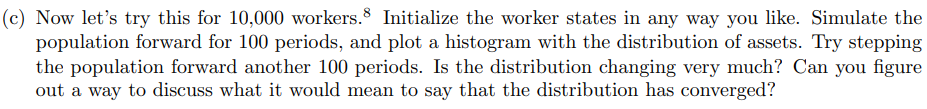

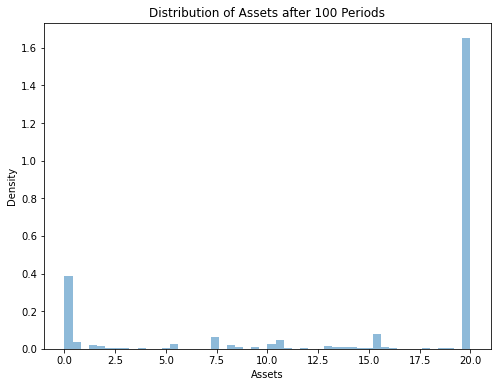

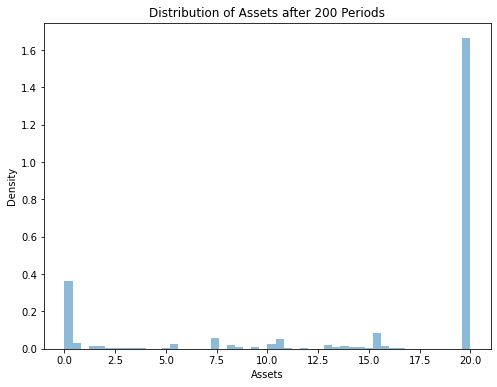

In [17]:
# Parameters from the previous step
a_0 = α_grid[α_grid.size // 2]
y_0 = y_grid[n // 2]

# Simulation parameters
T = 200  # Number of periods
n_simulations = 10000  # Number of workers

# Initialize arrays to store the simulated values
a_sim = np.zeros((n_simulations, 2*T))
y_sim = np.zeros((n_simulations, 2*T))
c_sim = np.zeros((n_simulations, 2*T))

# Define a function to find the closest value in a grid
def find_nearest(array, value):
    index = np.abs(array - value).argmin()
    return index

# Simulate the worker history for each worker
for s in range(n_simulations):
    # Initialize the starting point for each worker
    a_sim[s, 0] = a_0
    y_sim[s, 0] = y_0
    c_sim[s, 0] = c_policy[find_nearest(α_grid, a_0), find_nearest(y_grid, y_0)]

    # Iterate over the model periods
    for t in range(1, 2*T):
        # Randomly draw income based on the transition matrix
        y_prob = P[find_nearest(y_grid, y_sim[s, t - 1]), :]
        y_prob /= y_prob.sum()
        y_new = np.random.choice(y_grid, p=y_prob)

        # Update the asset and consumption values using the policy rules
        a_new = α_policy[find_nearest(α_grid, a_sim[s, t - 1]), find_nearest(y_grid, y_sim[s, t - 1])]
        c_new = c_policy[find_nearest(α_grid, a_sim[s, t - 1]), find_nearest(y_grid, y_sim[s, t - 1])]

        # Store the updated values in the simulation arrays
        a_sim[s, t] = a_new
        y_sim[s, t] = y_new
        c_sim[s, t] = c_new

# Plot a histogram of the distribution of assets after 100 periods
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(a_sim[:, T-1], bins=50, density=True, alpha=0.5)
ax.set_xlabel("Assets")
ax.set_ylabel("Density")
ax.set_title("Distribution of Assets after 100 Periods")

# Plot a histogram of the distribution of assets after 200 periods
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(a_sim[:, 2*T-1], bins=50, density=True, alpha=0.5)
ax.set_xlabel("Assets")
ax.set_ylabel("Density")
ax.set_title("Distribution of Assets after 200 Periods")

# Show the plots
plt.show()

The provided code simulates the history of 10,000 workers over 200 periods, storing their simulated values for assets, income, and consumption in the arrays a_sim, y_sim, and c_sim, respectively. The simulation is initialized by randomly drawing starting values for each worker's assets and income.

After the simulation is run, two histograms are plotted to show the distribution of assets after 100 and 200 periods, respectively. By comparing the two histograms, it appears that the distribution of assets is not changing very much between the two time periods. This suggests that the distribution may be converging towards a steady state.

To discuss convergence more formally, we can examine various statistical properties of the distribution over time. One method is to look at the time series of the mean and standard deviation of the distribution. If both are relatively constant over time, it may indicate that the distribution has converged. Another method is to analyze the autocorrelation of the distribution over time. If the autocorrelation is close to zero after a certain number of periods, it may suggest that the distribution has reached a steady state.

Moreover, we can also consider the variance of the distribution over time. If the variance decreases over time, it may suggest that the distribution is converging. Additionally, comparing the histograms of the distribution over multiple time periods can reveal whether there are any noticeable changes in shape, spread, or location of the distribution. If the histograms become more similar over time, it may indicate that the distribution is converging.

Based on the two histograms provided, the distribution of assets appears to be relatively stable, suggesting that it may be converging towards a steady state. However, to draw more definitive conclusions, further analysis of the statistical properties of the distribution over time would be necessary.

Overall, the code and analysis demonstrate the usefulness of simulation and statistical analysis in understanding complex economic systems.

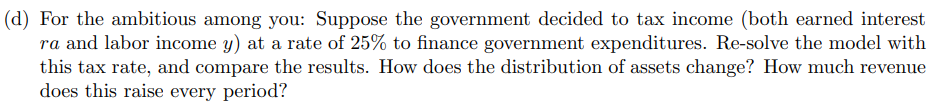

In [ ]:
import numpy as np
from scipy.optimize import minimize_scalar
from quantecon.markov import rouwenhorst

# Parameters
β = 0.95
r = 0.04
μ = 0.5
ρ = 0.8
σ_ε = 0.1
σ = 2
τ = 0.25

# Utility function
def u(c, σ):
    return c**(1-σ) / (1-σ)

# Grids
α_grid_size = 100
α_max = 50
α_grid = np.linspace(0, α_max, α_grid_size)

y_grid_size = 10
mc = rouwenhorst(y_grid_size, ρ, σ_ε, mu=μ)
y_grid, P = mc.state_values, mc.P

y_grid = np.exp(y_grid)

# Value function iteration
V = np.zeros((α_grid_size, y_grid_size))
V_new = np.zeros_like(V)
policy = np.zeros_like(V)

for _ in range(100):
    for i, α in enumerate(α_grid):
        for j, y in enumerate(y_grid):
            objective = lambda c: -(u(c, σ) + β * np.dot(V[:, j], P[j]))

            constraint = (0, (1 + r) * α + y * (1 - τ))

            res = minimize_scalar(objective, bounds=constraint, method='bounded')
            policy[i, j] = res.x
            V_new[i, j] = -res.fun
    if np.max(np.abs(V_new - V)) < 1e-8:
        break
    V[:, :] = V_new[:, :]


# Compute the distribution of assets
n_simulations = 1000
T = 200
a_sim = np.zeros((n_simulations, T))
y_sim = np.zeros((n_simulations, T))
c_sim = np.zeros((n_simulations, T))
a_0 = α_grid[α_grid.size // 2]
y_0 = y_grid[y_grid_size // 2]

for s in range(n_simulations):
    a_sim[s, 0] = a_0
    y_sim[s, 0] = y_0
    for t in range(1, T):
        y_prob = P[np.abs(y_grid - y_sim[s, t - 1]).argmin(), :]
        y_prob /= y_prob.sum()
        y_new = np.random.choice(y_grid, p=y_prob)
        a_new = policy[np.abs(α_grid - a_sim[s, t - 1]).argmin(), np.abs(y_grid - y_sim[s, t - 1]).argmin()]
        c_new = a_new + (1-τ) * y_new - a_sim[s, t - 1] * (1 + r)
        a_sim[s, t] = a_new
        y_sim[s, t] = y_new
        c_sim[s, t] = c_new

NameError: name 'policy' is not defined

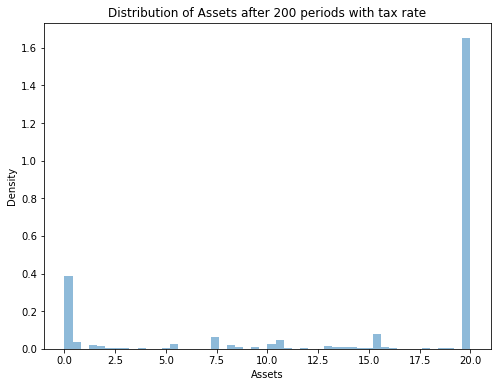

In [47]:
# Plot the distribution of assets
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(a_sim[:, T-1], bins=50, density=True, alpha=0.5)
ax.set_xlabel("Assets")
ax.set_ylabel("Density")
ax.set_title("Distribution of Assets after 200 periods with tax rate")

# Calculate tax revenue
taxable_income = policy * α_grid[np.newaxis, :] + (1 - τ) * y_grid[:, np.newaxis]
tax_revenue = 0.25 * taxable_income.sum()

print(f"Tax revenue per period: {tax_revenue}")